# Actividad 6.2 (Valores Atípicos)
- Miranda Eugenia Colorado Arróniz A01737027

#### 1. Cargar el archivo hawaii.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('hawaii.csv')
df.head()

,id,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI",...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI",...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI",...,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0
3,5532,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,"Waialua, HI",...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
4,7888,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,"Pahoa, HI",...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0


#### 2. Aplicar métodos (Desviación Estándar y Rango Intercuartílico) para eliminar Outliers, comprobar con diagramas de caja por cada columna

a) Desviación Estándar

Límite superior permitido:
id                                              2.055882e+18
host_id                                         7.393984e+08
host_total_listings_count                       2.935940e+03
minimum_nights                                  1.010307e+02
maximum_nights                                  1.907376e+03
minimum_minimum_nights                          9.696807e+01
maximum_minimum_nights                          1.227260e+02
minimum_maximum_nights                          1.527366e+08
maximum_maximum_nights                          1.841888e+08
minimum_nights_avg_ntm                          9.871503e+01
maximum_nights_avg_ntm                          1.574720e+08
availability_30                                 4.078818e+01
availability_60                                 8.508060e+01
availability_90                                 1.311705e+02
availability_365                                5.631309e+02
calendar_updated                                         N

<Figure size 1500x800 with 0 Axes>

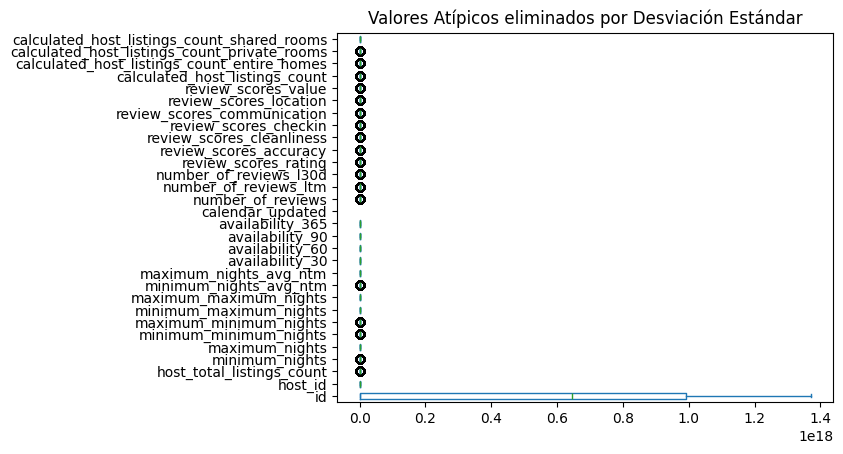

In [4]:
num = df.select_dtypes(include=[np.number])

# Límites
limite_superior = num.mean() + 3 * num.std()
limite_inferior = num.mean() - 3 * num.std()

print('Límite superior permitido:')
print(limite_superior)
print('\nLímite inferior permitido:')
print(limite_inferior)

df_outliers_std = num[(num <= limite_superior) & (num >= limite_inferior)]

# Ver que cuántos valores nulos quedan
print('\nValores nulos tras eliminar outliers:')
print(df_outliers_std.isnull().sum())

plt.figure(figsize=(15, 8))
df_outliers_std.plot(kind='box', vert=False)
plt.title('Valores Atípicos eliminados por Desviación Estándar')
plt.show()

b) Rango Intercuartílico

Límite superior permitido (IQR):
id                                              2.482254e+18
host_id                                         8.512263e+08
host_total_listings_count                       7.040000e+02
minimum_nights                                  8.500000e+00
maximum_nights                                  2.677500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.450000e+01
minimum_maximum_nights                          2.772000e+03
maximum_maximum_nights                          2.542500e+03
minimum_nights_avg_ntm                          9.500000e+00
maximum_nights_avg_ntm                          2.632500e+03
availability_30                                 3.950000e+01
availability_60                                 9.200000e+01
availability_90                                 1.465000e+02
availability_365                                6.330000e+02
calendar_updated                                    

<Figure size 1500x800 with 0 Axes>

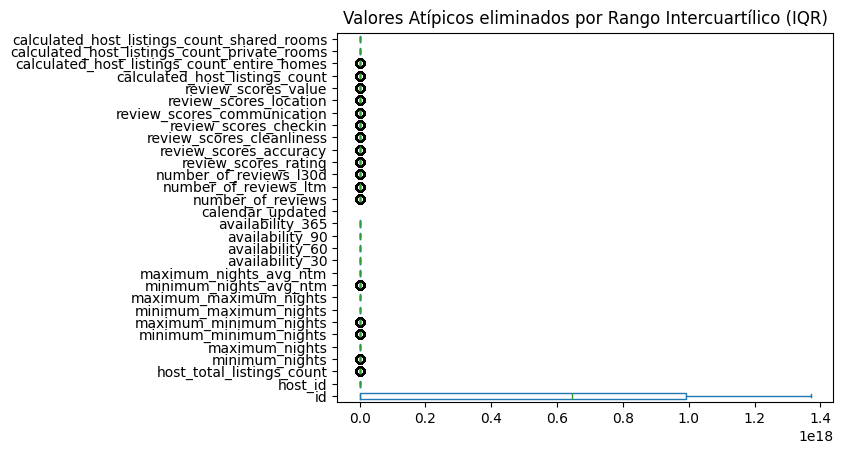

In [5]:
num = df.select_dtypes(include=[np.number])

# Q1, Q3 e IQR
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

limite_superior_iqr = Q3 + 1.5 * IQR
limite_inferior_iqr = Q1 - 1.5 * IQR

print('Límite superior permitido (IQR):')
print(limite_superior_iqr)
print('\nLímite inferior permitido (IQR):')
print(limite_inferior_iqr)

df_outliers_iqr = num[(num <= limite_superior_iqr) & (num >= limite_inferior_iqr)]

# Cuántos valores nulos quedan
print('\nValores nulos tras eliminar outliers (IQR):')
print(df_outliers_iqr.isnull().sum())

plt.figure(figsize=(15, 8))
df_outliers_iqr.plot(kind='box', vert=False)
plt.title('Valores Atípicos eliminados por Rango Intercuartílico (IQR)')
plt.show()